# 지하철 승객 데이터 분석

In [1]:
import pandas as pd

fpath = './data/subway_raw.xlsx'

raw = pd.read_excel(fpath) 
raw.sample(5)

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
21912,20190207,일산선,1954,백석,12173,11986,20190210,목
37655,20190315,6호선,2620,월드컵경기장(성산),5723,5854,20190318,금
54362,20190412,3호선,336,학여울,4617,4729,20190415,금
72104,20190514,안산선,1763,수리산,5369,4155,20190517,화
82828,20190603,2호선,222,강남,106699,107870,20190606,월


In [2]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
 7   요일      99342 non-null  object
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


# 가장 승객이 많은 날짜?

In [3]:
data_date = raw.pivot_table(index = ['사용일자','요일'], values = '승차총승객수', aggfunc='sum')
data_date.head()

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294


In [4]:
data_date.sort_values(by = '승차총승객수', ascending = False)


,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472
...,...,...
20190206,수,3741895
20190101,화,3419948
20190203,일,3412440


# 5월에 지하철 승객수가 많다?

In [17]:
yearmonth_list = []
monthday_list = []
for date in raw['사용일자']:
    yearmonth = str(date)[:6]
    yearmonth_list.append(yearmonth)
    monthday = str(date)[4:]
    monthday_list.append(monthday)

In [18]:
raw['연월'] = yearmonth_list
raw['월일'] = monthday_list

raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화,201901,0101
1,20190101,경춘선,1322,상천,275,114,20190104,화,201901,0101
2,20190101,경춘선,1321,청평,1509,1083,20190104,화,201901,0101
3,20190101,경춘선,1320,대성리,357,271,20190104,화,201901,0101
4,20190101,경춘선,1319,마석,1772,1963,20190104,화,201901,0101


In [7]:
data_month = raw.pivot_table(index ='연월' ,values = '승차총승객수', aggfunc ='sum').sort_values(by = '승차총승객수', ascending = False)

In [8]:
data_month.head(3)

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039


# 금요일이 가장 승객수가 많다?

In [9]:
data_week = raw.pivot_table(index = '요일', values = '승차총승객수', aggfunc = 'sum')
data_week = data_week.sort_values(by='승차총승객수', ascending = False)
data_week

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


# 월별 편차를 그래프로살펴보기

In [10]:
yearmonth = '201901'
cond = raw['연월'] == yearmonth
raw[cond]
df_selected = raw[cond]

In [11]:
df_selected.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화,201901,0101
1,20190101,경춘선,1322,상천,275,114,20190104,화,201901,0101
2,20190101,경춘선,1321,청평,1509,1083,20190104,화,201901,0101
3,20190101,경춘선,1320,대성리,357,271,20190104,화,201901,0101
4,20190101,경춘선,1319,마석,1772,1963,20190104,화,201901,0101


In [12]:
df_pivot = df_selected.pivot_table(index = ['월일','요일'], values = '승차총승객수', aggfunc = 'sum')
df_pivot = df_pivot.reset_index()
df_pivot

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294
5,0106,일,4408718
6,0107,월,7824428
7,0108,화,7913162
8,0109,수,7815405
9,0110,목,7977300


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

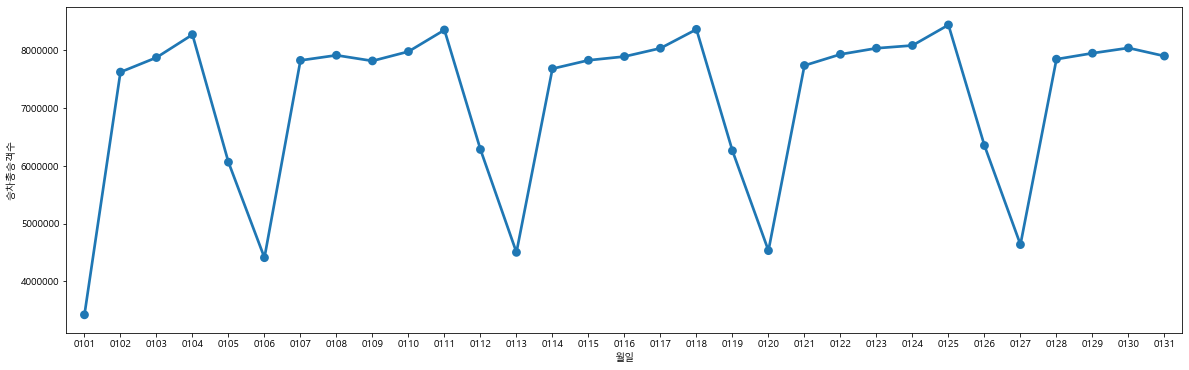

In [14]:
fig, ax = plt.subplots(figsize = (20,6))

sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')

# 월별 일자별 그래프

In [15]:
raw['연월'].unique()

array(['201901', '201902', '201903', '201904', '201905', '201906'],
      dtype=object)

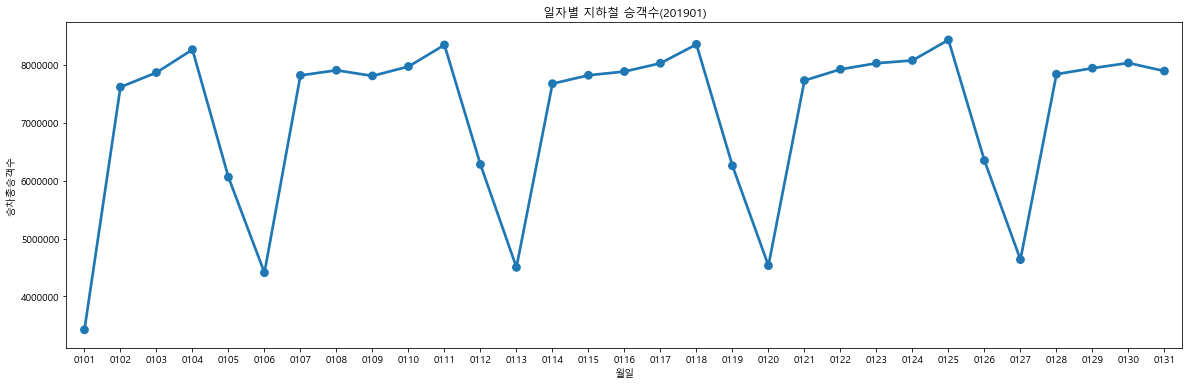

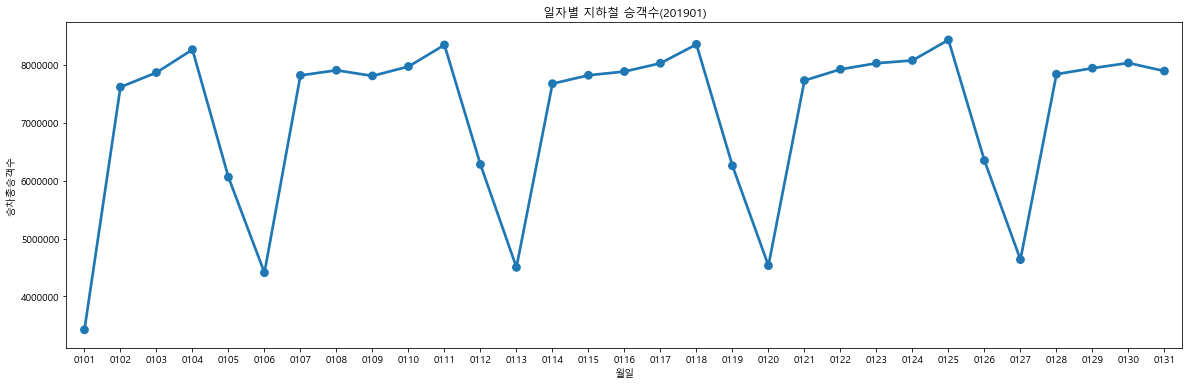

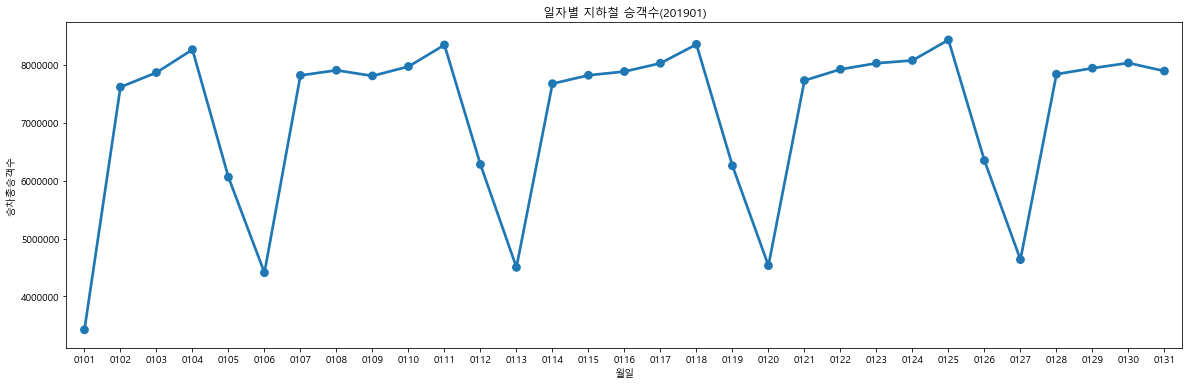

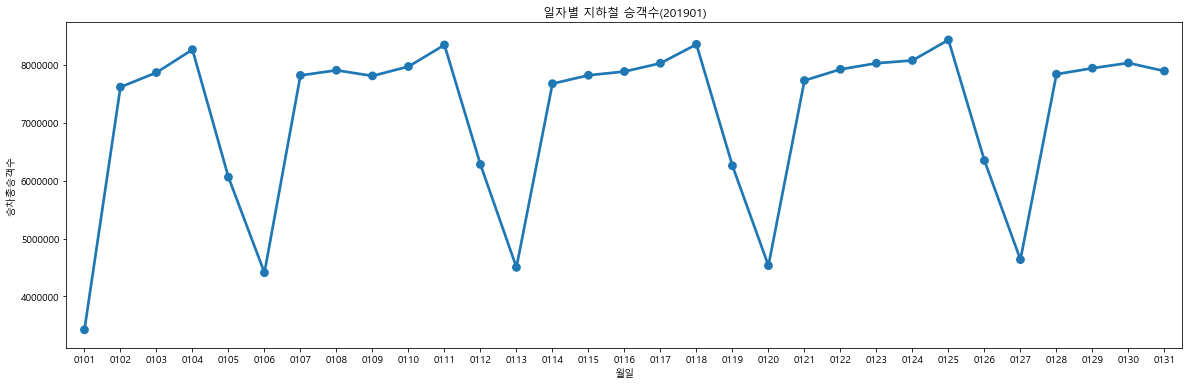

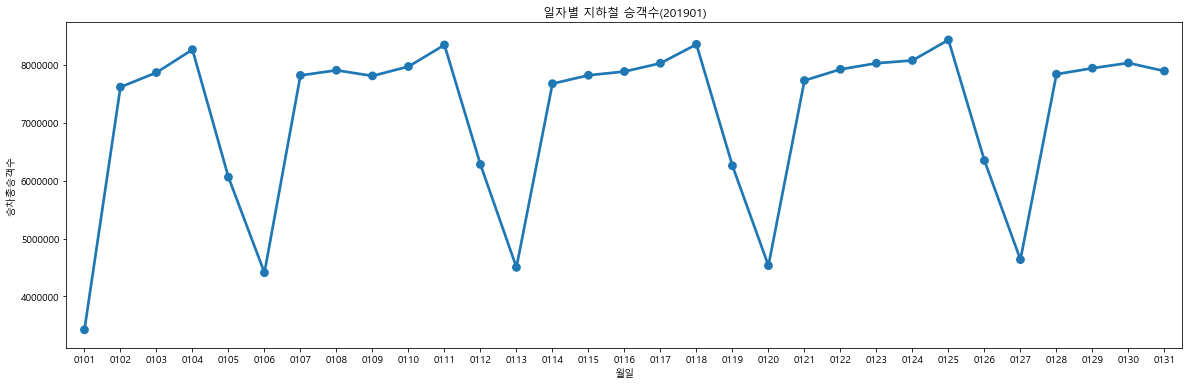

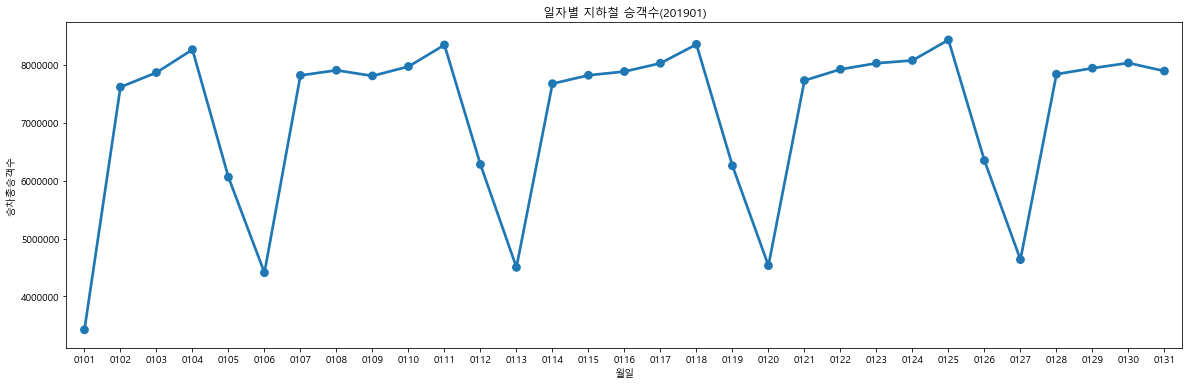

In [16]:
for yeaermonth in raw['연월'].unique():
    cond = raw['연월'] == yearmonth
    df_selected = raw[cond]    
    
    
    df_pivot = df_selected.pivot_table(index = ['월일','요일'], values = '승차총승객수', aggfunc = 'sum')
    df_pivot = df_pivot.reset_index()

    fig, ax = plt.subplots(figsize = (20,6))
    ax.set_title('일자별 지하철 승객수({})'.format(yearmonth))
    sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')

# 승객이 가장 많이 타는 역은?

In [19]:

data_station = raw.pivot_table(index = '역명', values = '승차총승객수',aggfunc = 'sum')
data_station = data_station.sort_values(by = '승차총승객수', ascending =False)
data_station.head()

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147


# 노선별 역,요일 승객수 비교

In [20]:
raw.columns



Index(['사용일자', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자', '요일', '연월',
       '월일'],
      dtype='object')

In [21]:
raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [22]:
line = '1호선'
data_line = raw[raw['노선명'] == line]
data_line.head()

df_pivot = data_line.pivot_table(index = ['역ID','역명'], columns = '요일', values = '승차총승객수', aggfunc = 'sum')
df_pivot = df_pivot[['월','화','수','목','금','토','일']]
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,1393534,1450435,1294993,1464058,1713426,1305254,982663
151,시청,640200,713864,628091,703511,762319,509676,298211
152,종각,1121870,1197708,1081454,1209061,1322916,864711,529500
153,종로3가,838255,873786,800413,899436,977886,880772,538763
154,종로5가,684973,721713,639769,728118,783878,687458,331649
155,동대문,356532,373526,329555,365131,400480,392698,323882
156,신설동,415996,431354,386989,430631,467609,323935,241796
157,제기동,523596,537898,475634,535471,562030,496330,329532
158,청량리(서울시립대입구),635328,663575,589248,659927,709061,632366,469806


In [23]:
df_pivot = df_pivot / 10000 ## 10,000단위로 바꾸기
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

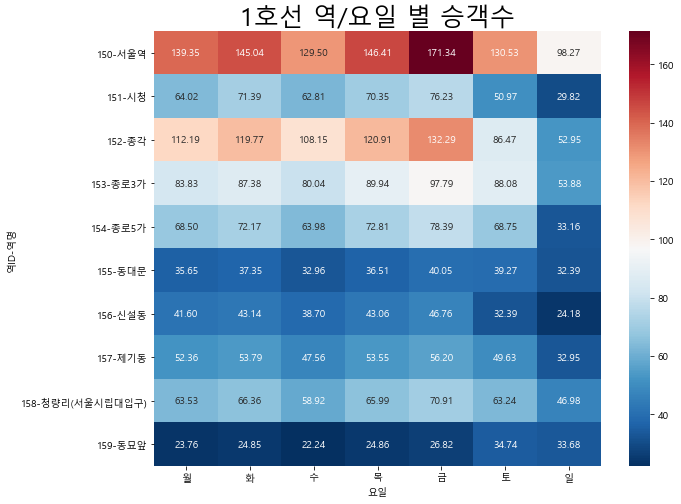

In [34]:
# 히트맵 시각화

fig, ax = plt.subplots(figsize = (10,8))
plt.title(f'{line} 역/요일 별 승객수', fontsize = 25)
sns.heatmap(df_pivot, cmap = 'RdBu_r', 
            annot = True,
           fmt = '.2f')



In [26]:
# 1~9호선 노선별 리스트 정리

raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [27]:
for line in raw['노선명'].unique():
    if line[-2:] == '호선':
        print(line)

2호선
9호선
8호선
7호선
6호선
공항철도 1호선
5호선
4호선
3호선
1호선


In [28]:
line_seoul_list = []
for line in raw['노선명'].unique():
    if line[1:] == '호선':
        print(line)
        line_seoul_list.append(line)

2호선
9호선
8호선
7호선
6호선
5호선
4호선
3호선
1호선


In [29]:
line_seoul_list

['2호선', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '1호선']

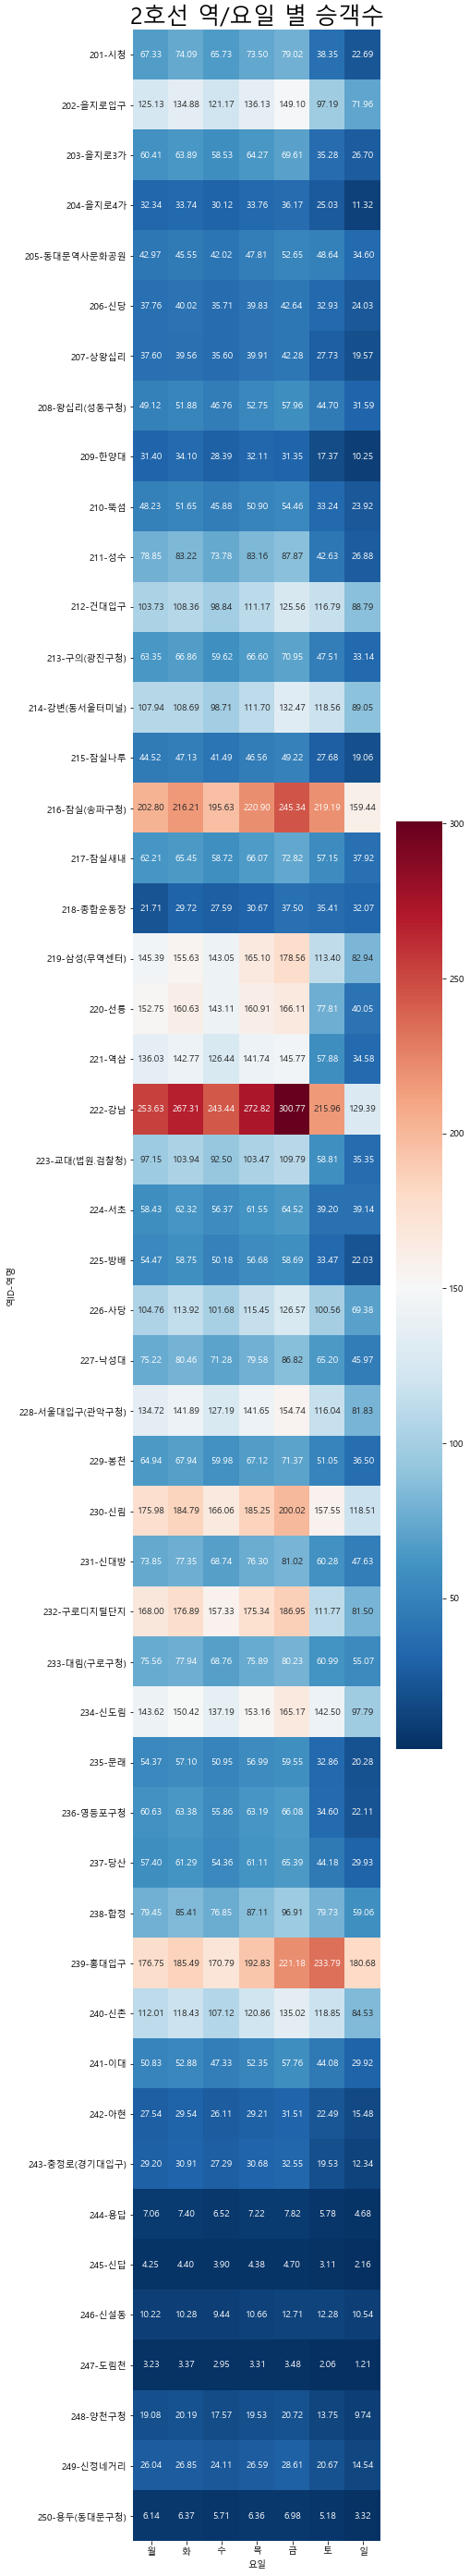

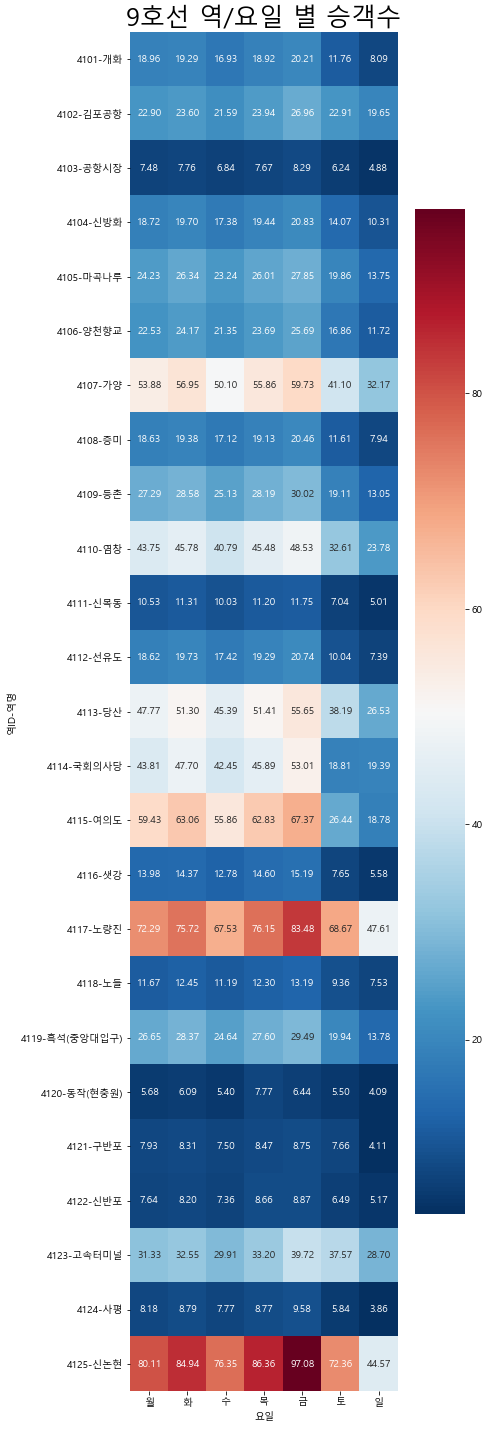

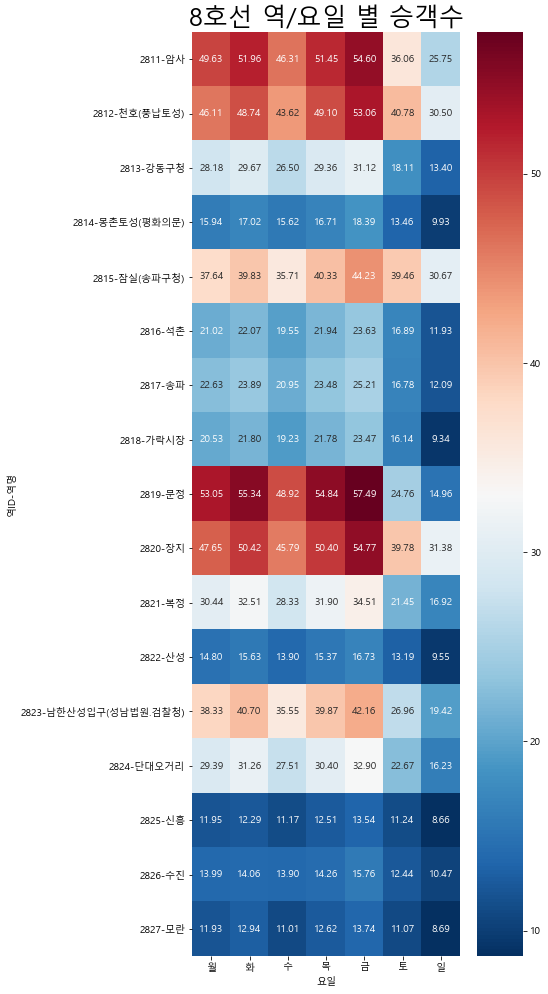

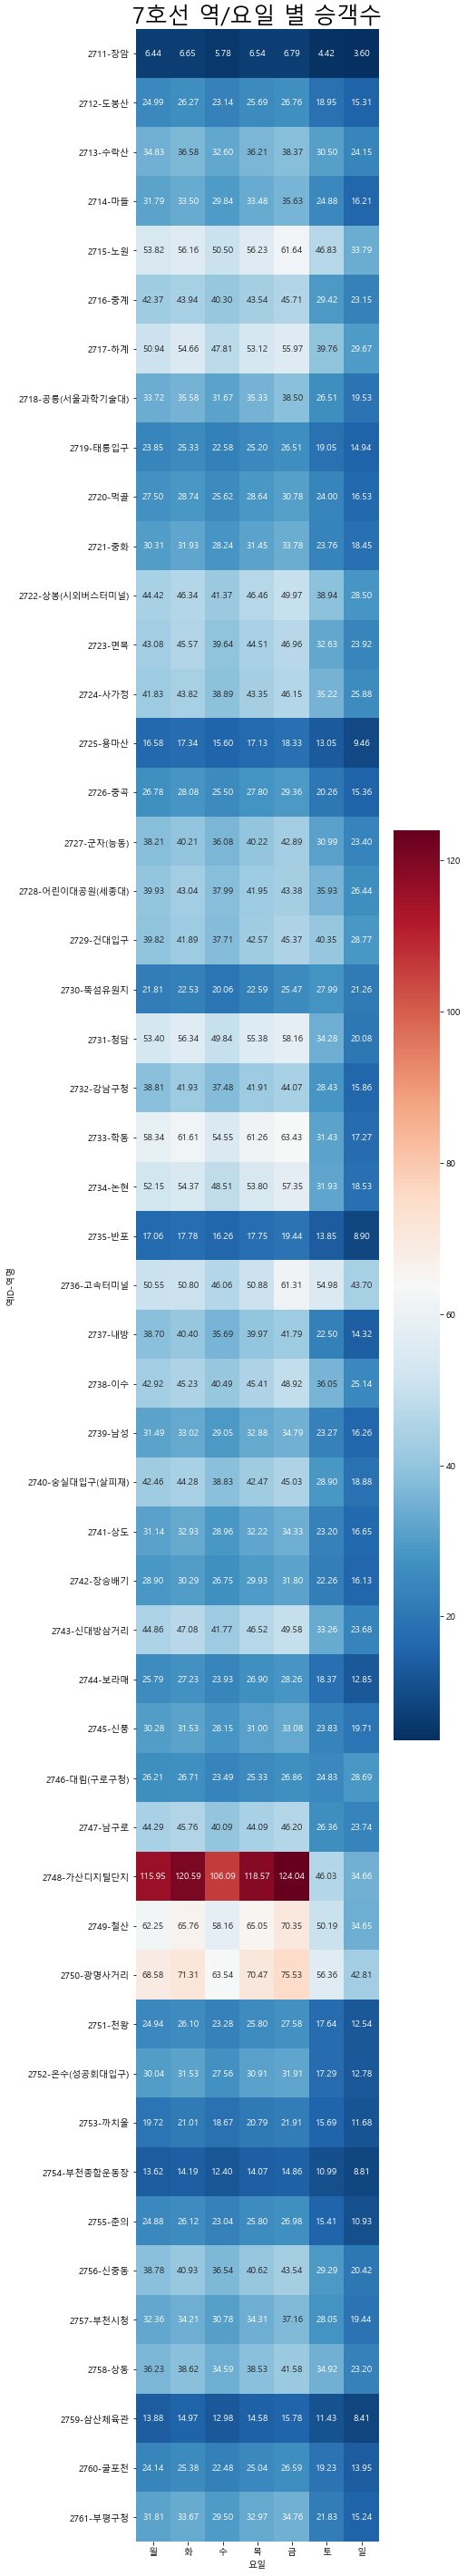

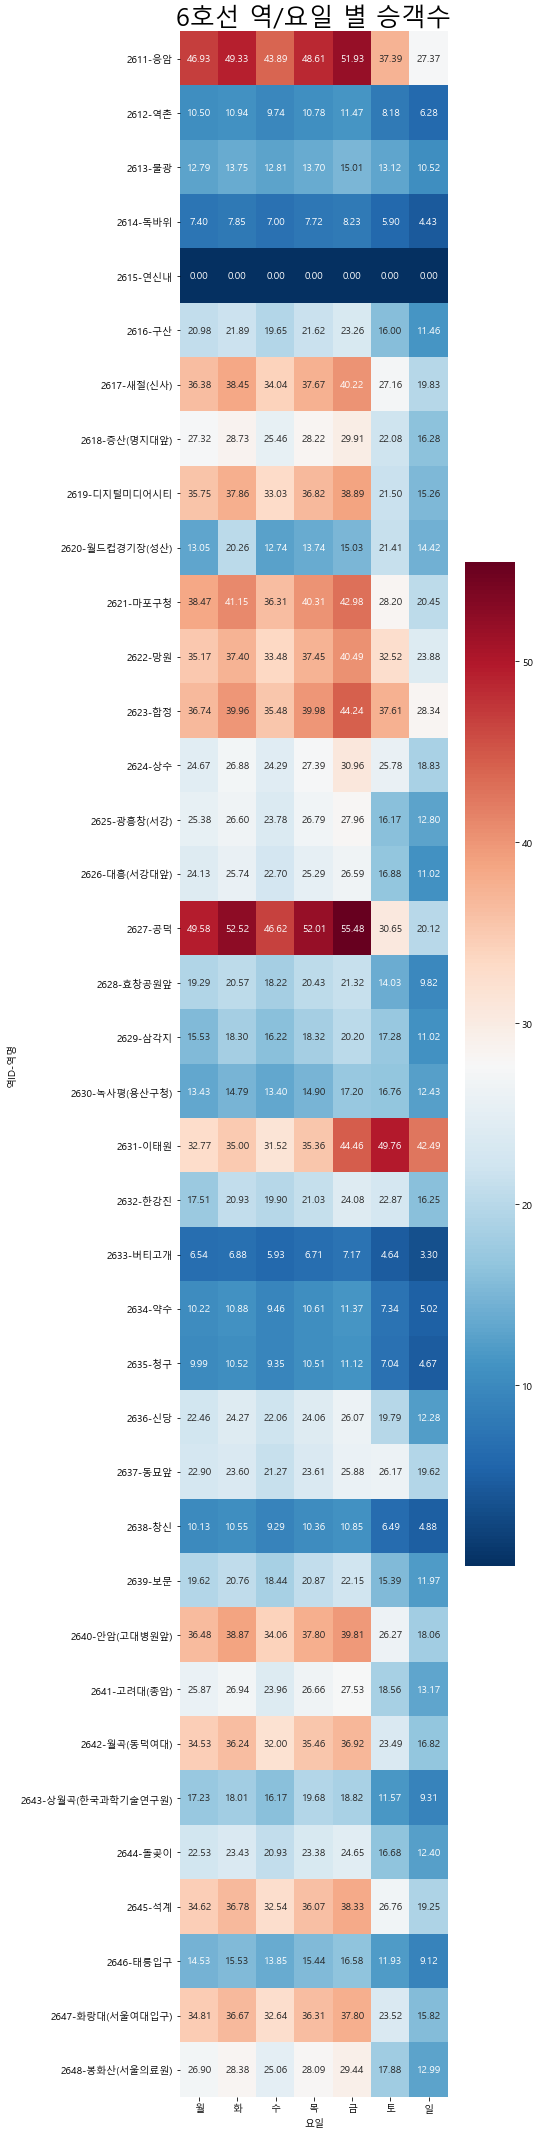

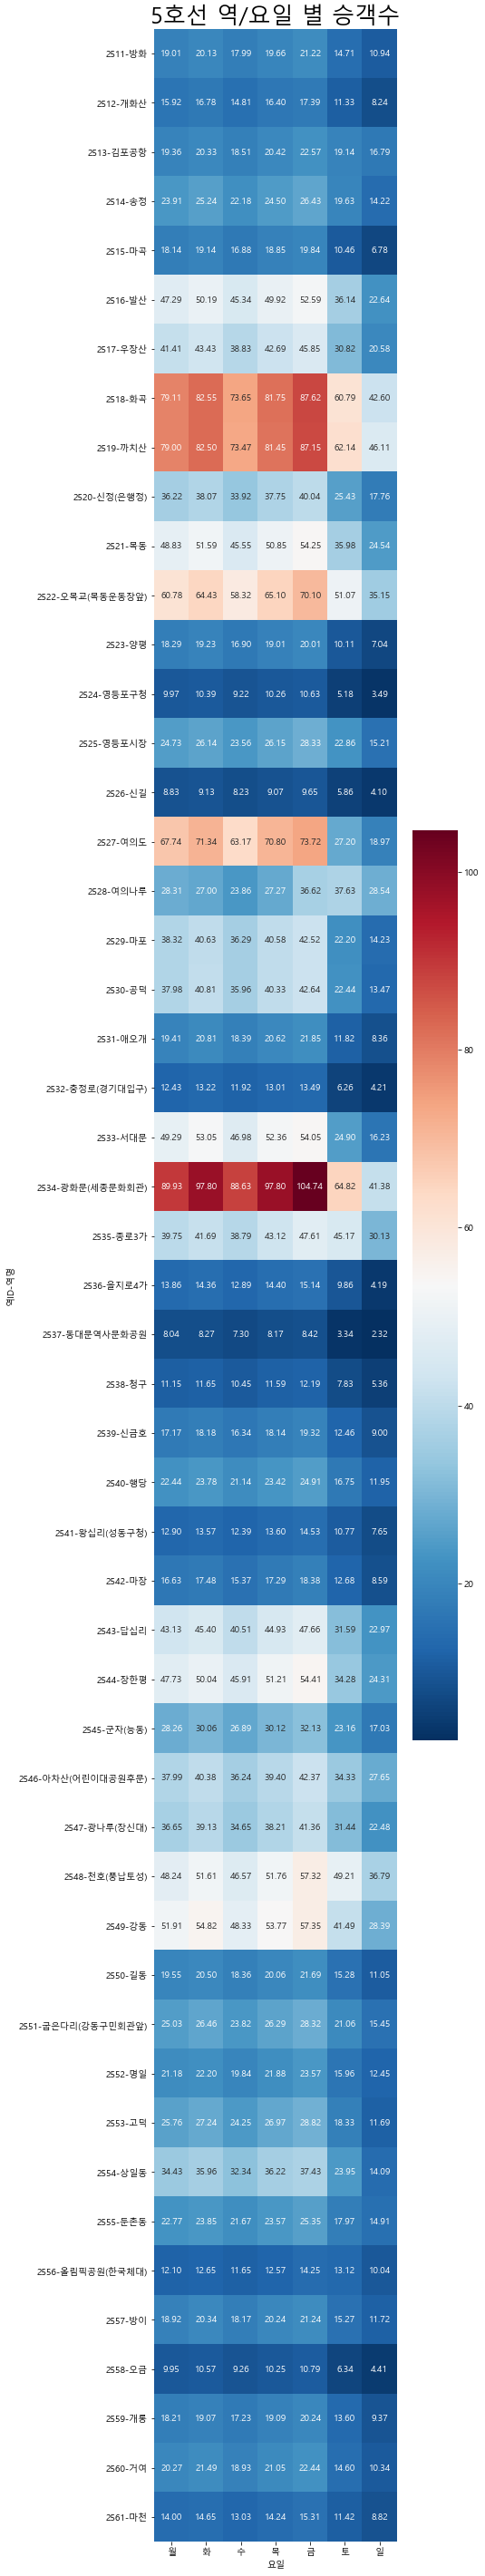

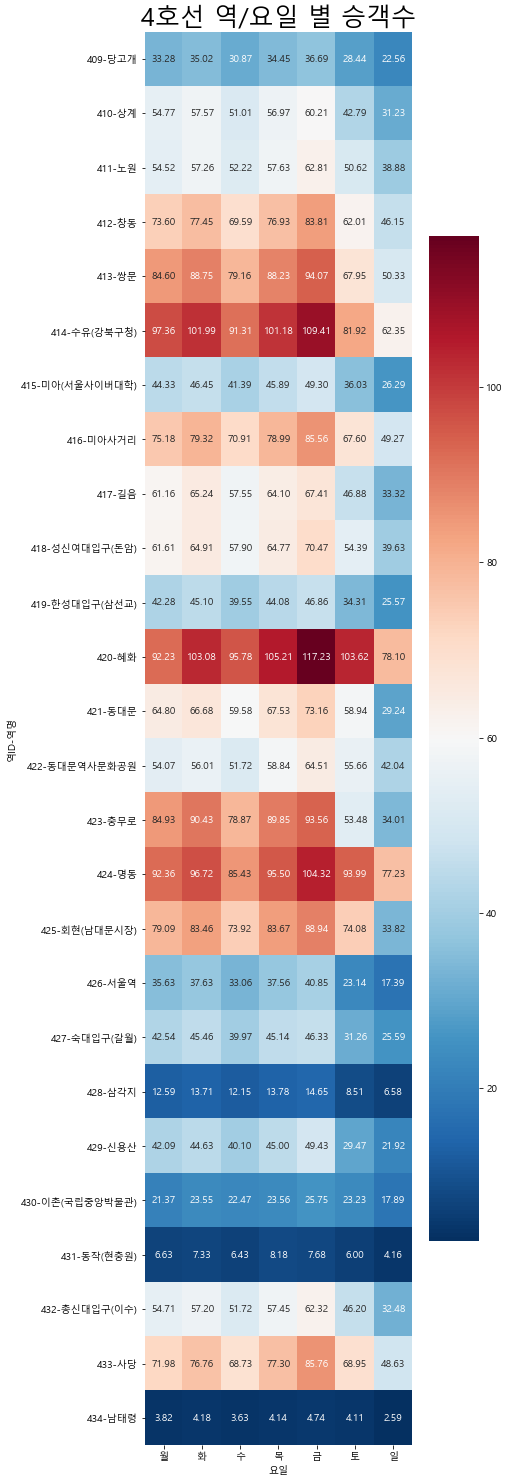

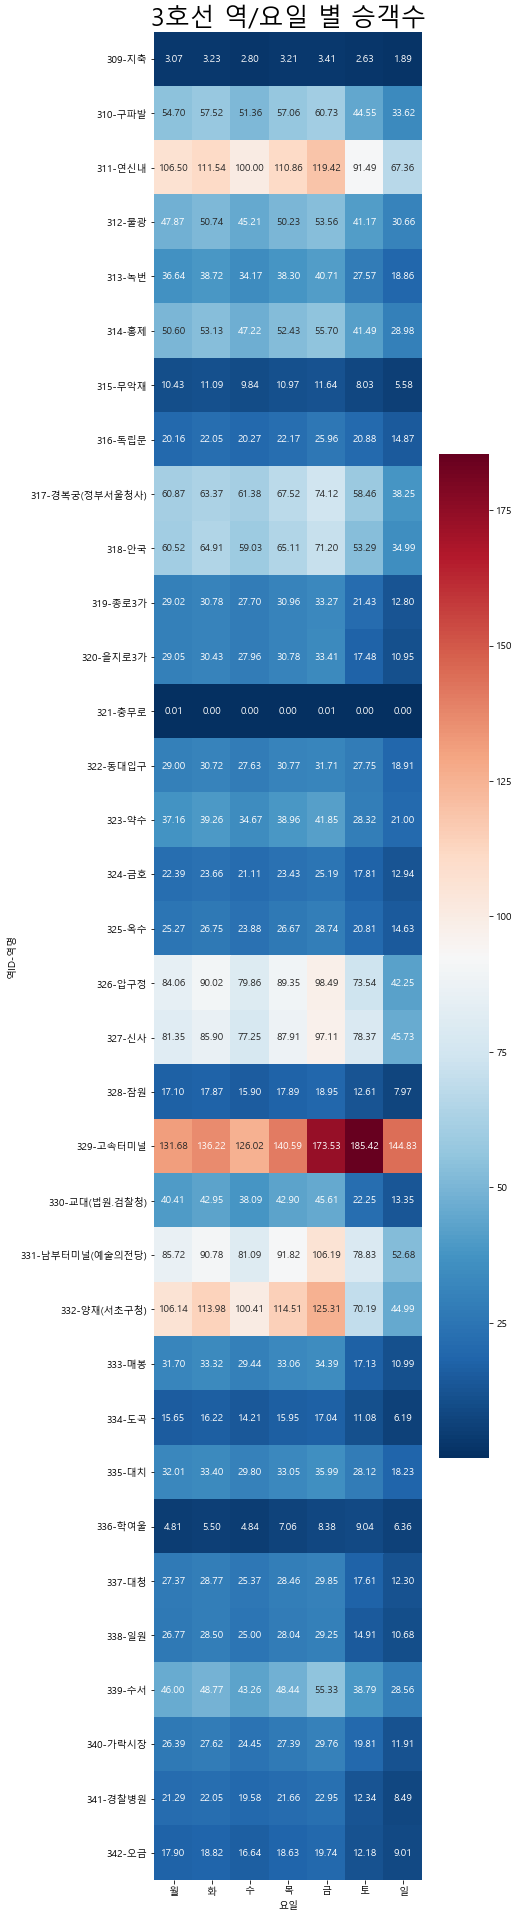

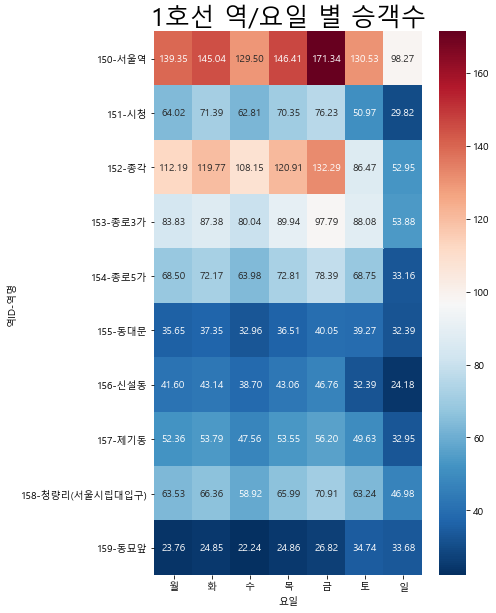

In [30]:
for line in line_seoul_list:
    
    data_line = raw[raw['노선명'] == line]

    df_pivot = data_line.pivot_table(index = ['역ID','역명'], columns = '요일', values = '승차총승객수', aggfunc = 'sum')
    df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    df_pivot = df_pivot/10000
    
    fig, ax = plt.subplots(figsize = (6,len(df_pivot/3))) # 세로 칸 크기 늘리기
    plt.title(f'{line} 역/요일 별 승객수', fontsize = 25)
    sns.heatmap(df_pivot, cmap = 'RdBu_r', 
                annot = True,
               fmt = '.2f')

# 승객이 가장 많이 타는 역은?

In [8]:

data_station = raw.pivot_table(index = '역명', values = '승차총승객수',aggfunc = 'sum')
data_station = data_station.sort_values(by = '승차총승객수', ascending =False)
data_station.head()

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147


# 노선별 역,요일 승객수 비교

In [31]:
raw.columns



Index(['사용일자', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자', '요일'], dtype='object')

In [30]:
raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [35]:
line = '1호선'
data_line = raw[raw['노선명'] == line]
data_line.head()

df_pivot = data_line.pivot_table(index = ['역ID','역명'], columns = '요일', values = '승차총승객수', aggfunc = 'sum')
df_pivot = df_pivot[['월','화','수','목','금','토','일']]
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,1393534,1450435,1294993,1464058,1713426,1305254,982663
151,시청,640200,713864,628091,703511,762319,509676,298211
152,종각,1121870,1197708,1081454,1209061,1322916,864711,529500
153,종로3가,838255,873786,800413,899436,977886,880772,538763
154,종로5가,684973,721713,639769,728118,783878,687458,331649
155,동대문,356532,373526,329555,365131,400480,392698,323882
156,신설동,415996,431354,386989,430631,467609,323935,241796
157,제기동,523596,537898,475634,535471,562030,496330,329532
158,청량리(서울시립대입구),635328,663575,589248,659927,709061,632366,469806


In [36]:
df_pivot = df_pivot / 10000 ## 10,000단위로 바꾸기
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

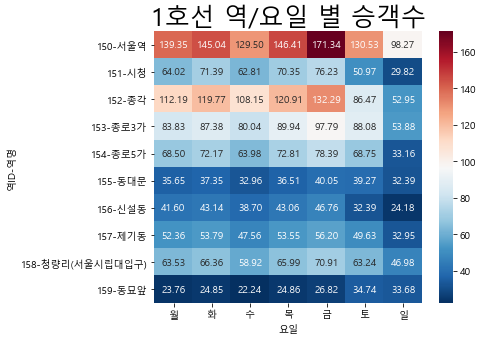

In [49]:
# 히트맵 시각화

fig, ax = plt.subplots(figsize = (6,5))
plt.title(f'{line} 역/요일 별 승객수', fontsize = 25)
sns.heatmap(df_pivot, cmap = 'RdBu_r', 
            annot = True,
           fmt = '.2f')



In [51]:
# 1~9호선 노선별 리스트 정리

raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [53]:
for line in raw['노선명'].unique():
    if line[-2:] == '호선':
        print(line)

2호선
9호선
8호선
7호선
6호선
공항철도 1호선
5호선
4호선
3호선
1호선


In [55]:
line_seoul_list = []
for line in raw['노선명'].unique():
    if line[1:] == '호선':
        print(line)
        line_seoul_list.append(line)

2호선
9호선
8호선
7호선
6호선
5호선
4호선
3호선
1호선


In [56]:
line_seoul_list

['2호선', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '1호선']

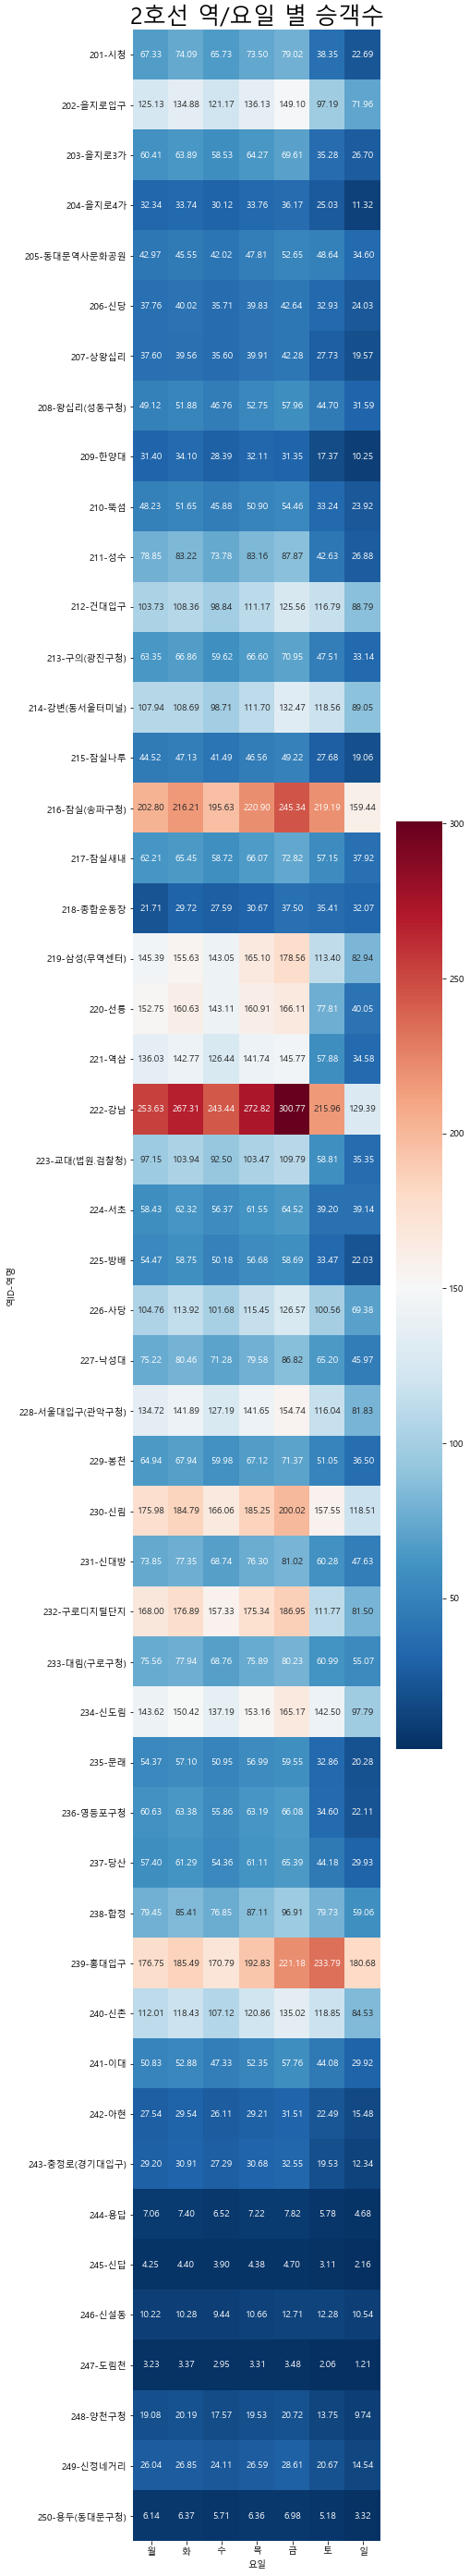

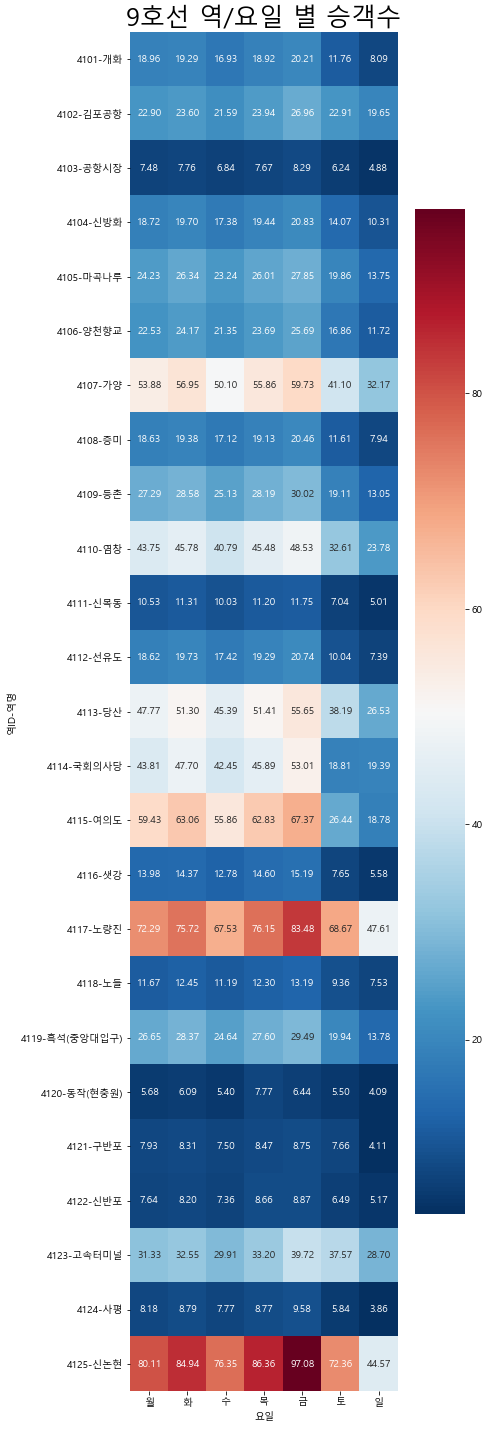

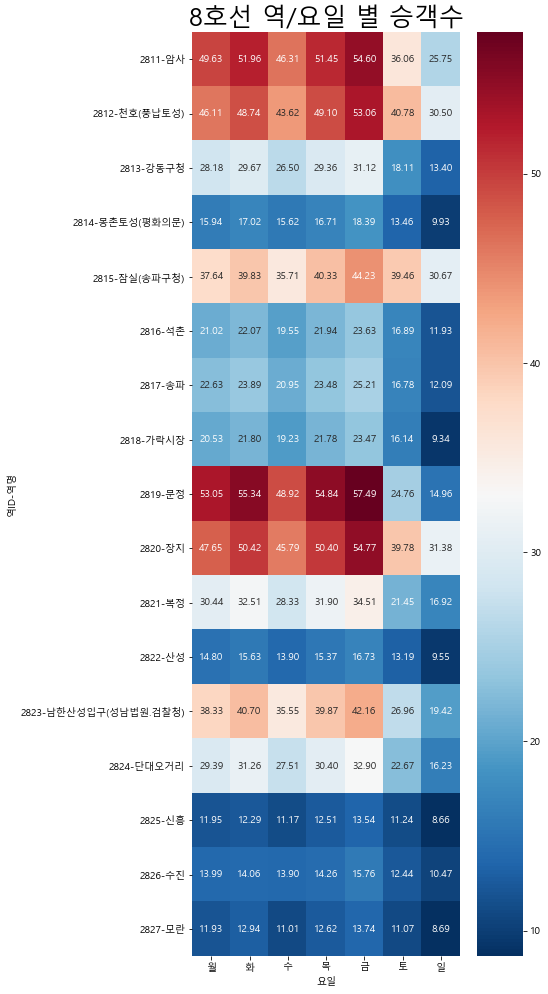

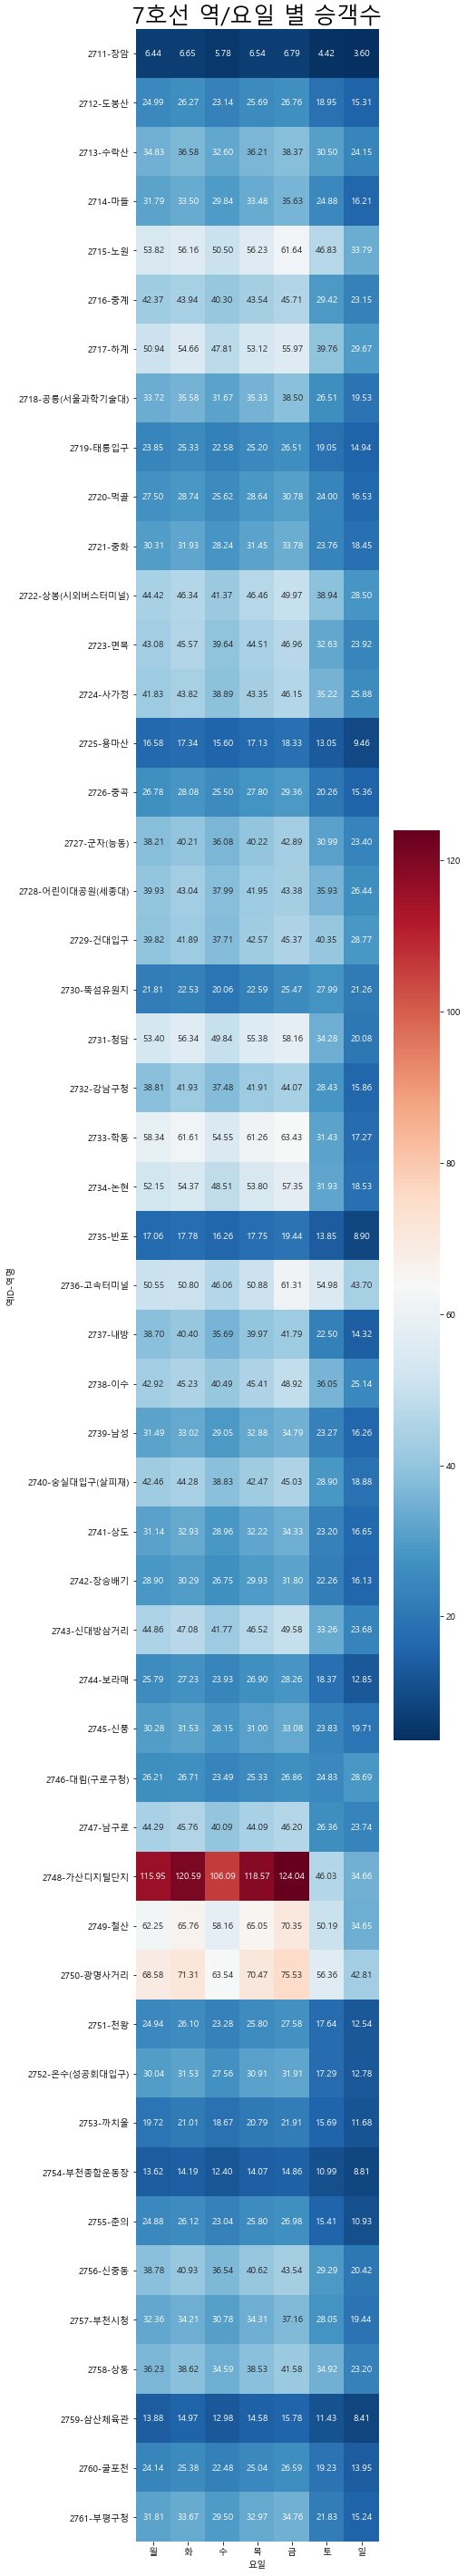

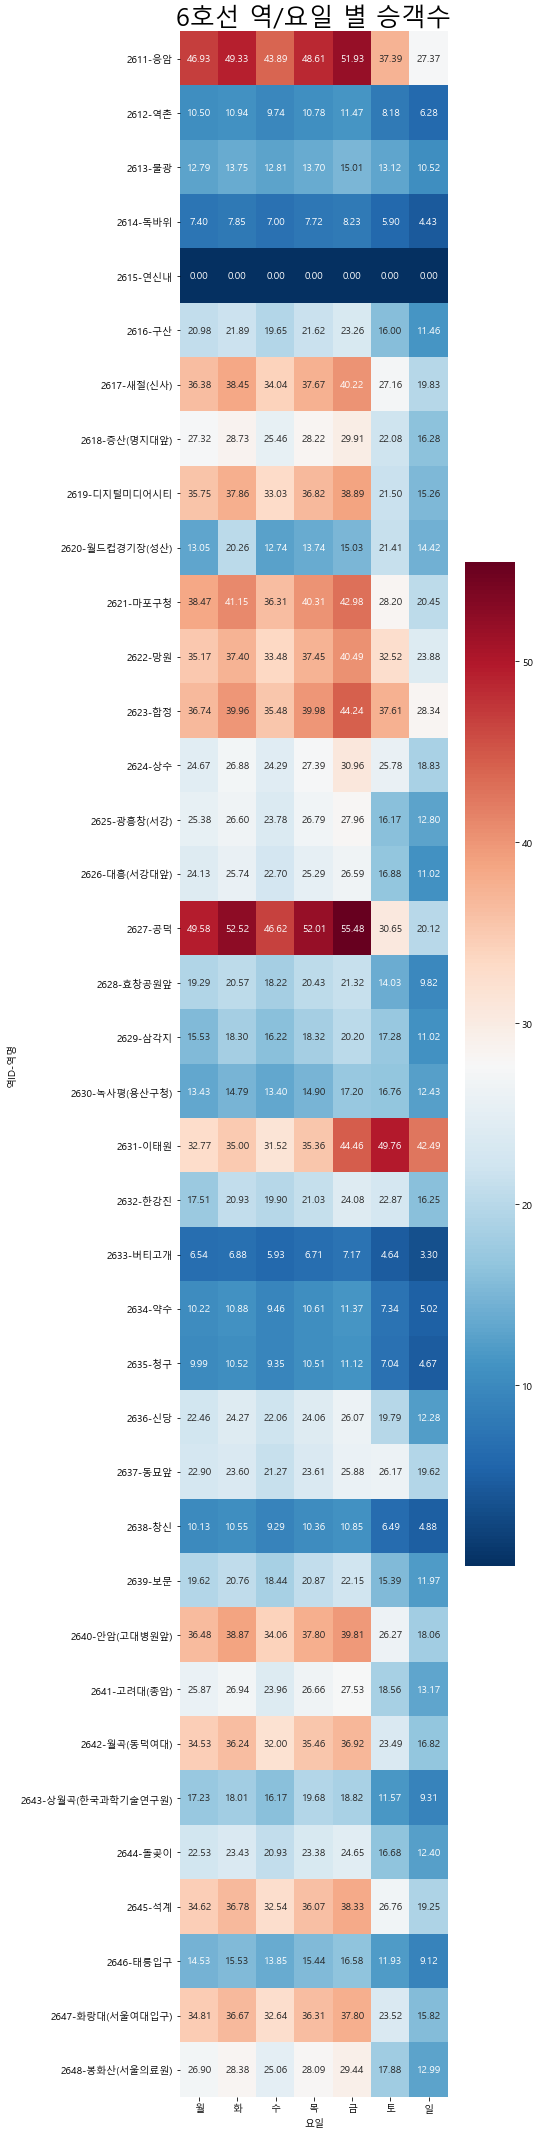

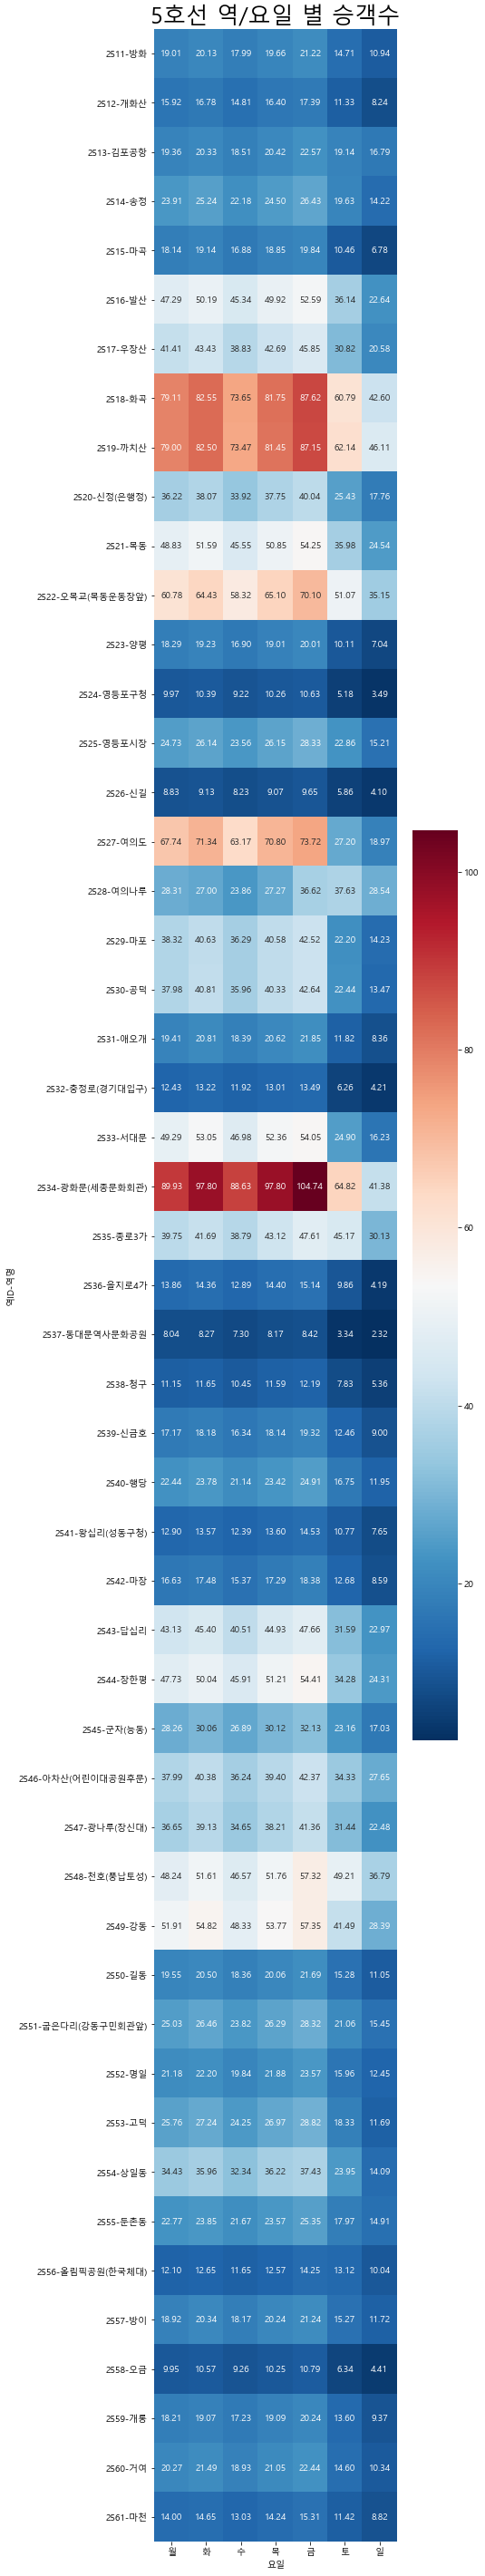

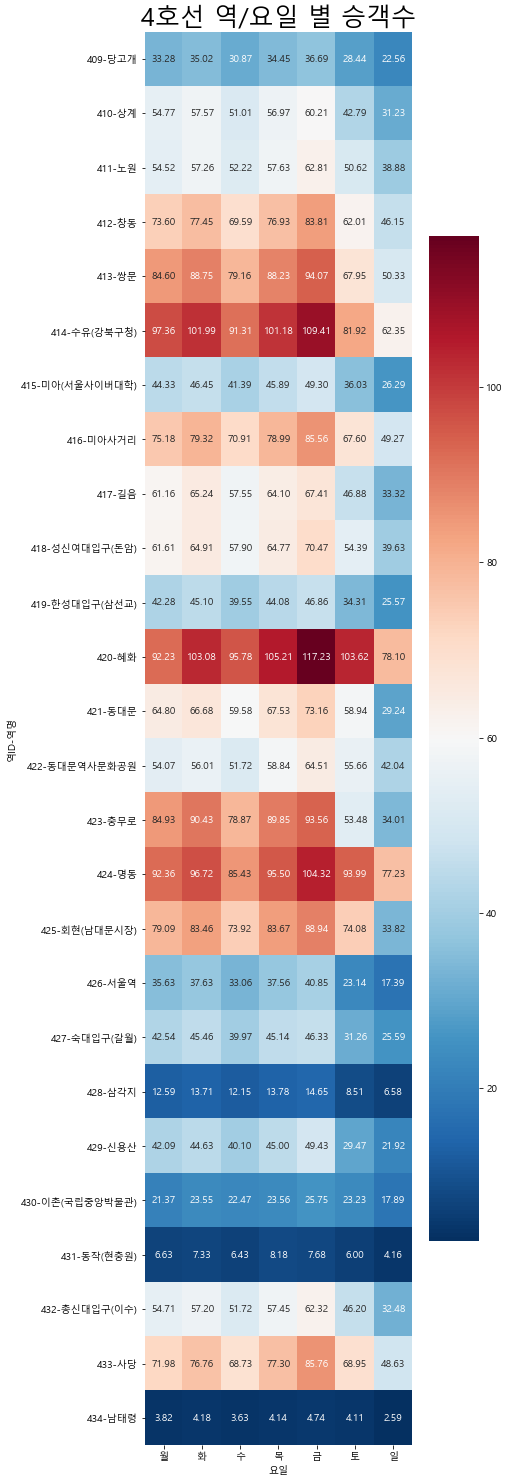

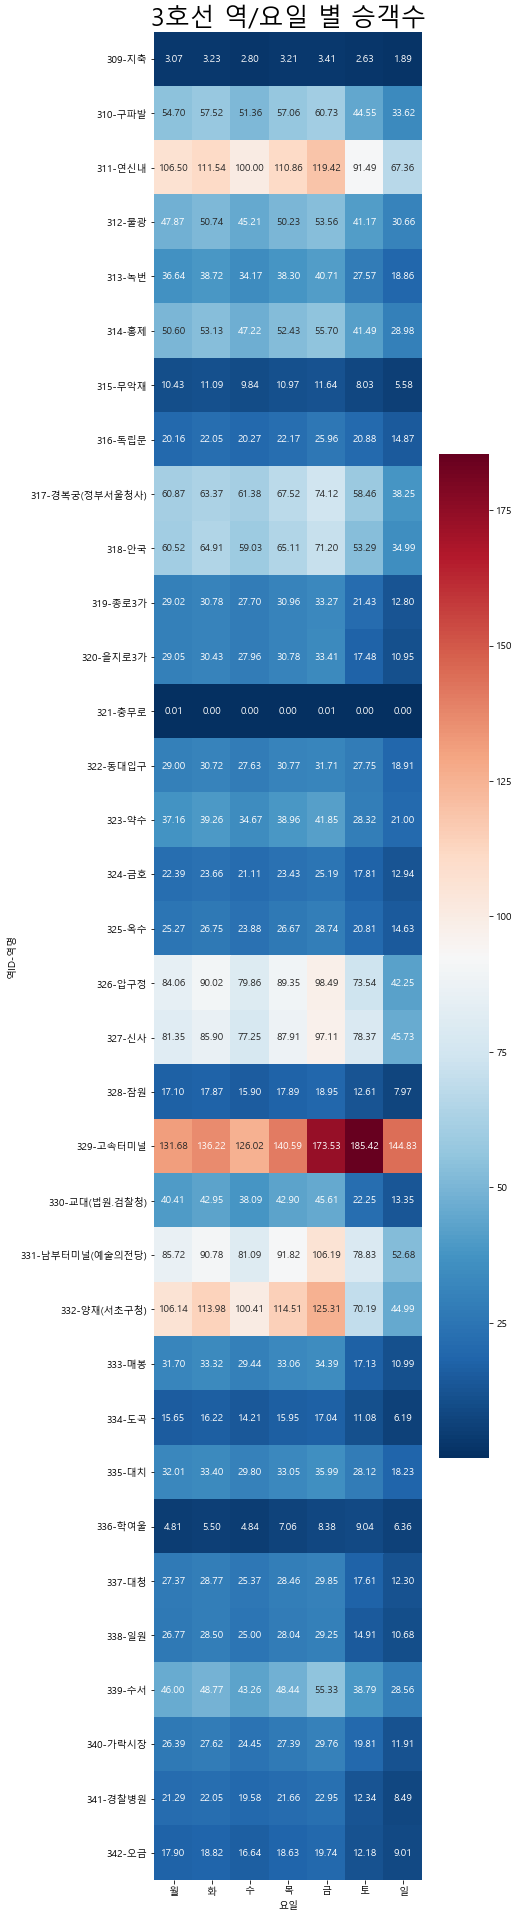

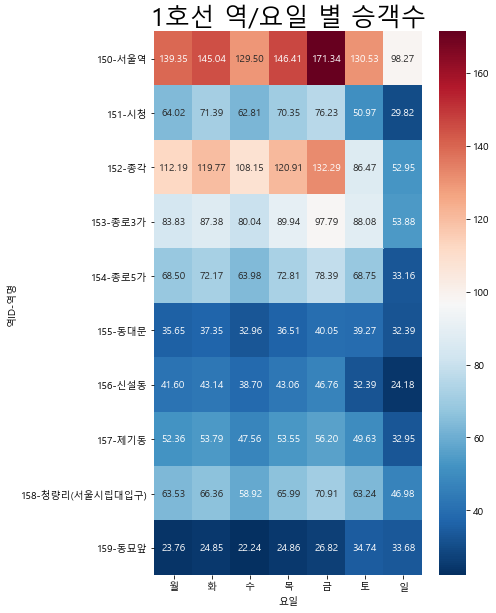

In [59]:
for line in line_seoul_list:
    
    data_line = raw[raw['노선명'] == line]

    df_pivot = data_line.pivot_table(index = ['역ID','역명'], columns = '요일', values = '승차총승객수', aggfunc = 'sum')
    df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    df_pivot = df_pivot/10000
    
    fig, ax = plt.subplots(figsize = (6,len(df_pivot/3))) # 세로 칸 크기 늘리기
    plt.title(f'{line} 역/요일 별 승객수', fontsize = 25)
    sns.heatmap(df_pivot, cmap = 'RdBu_r', 
                annot = True,
               fmt = '.2f')